# Predicting used car prices

In [1]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


In [2]:
import warnings
warnings.filterwarnings('ignore')

## Import dataset

In [3]:
data = pd.read_csv(r"C:\Users\manit\OneDrive\Documents\GitHub\used-vehicle-price-prediction-data-science\dataset.csv")
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


**most of the column dataTypes are 'object' data type, we will extract the info and convert it to required data Types(float)**

In [5]:
data.shape

(6019, 14)

## Data Cleaning

**as the new_price column has many null values we are going to drop that column**

In [6]:
data.drop(["New_Price", "Unnamed: 0"], axis=1, inplace=True)
data.tail()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65
6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,2.50


In [7]:
data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

**let's not drop the rows in the dataset with missing values, as we fill with the mean of those values**

## Test Train Split
* 70% as train data and 30% as test data
* training data is used to train the machine learning models and test data is used to check the accuracy of the model

In [8]:
dataFrame = data.iloc[:,:-1]
target = data.iloc[:,-1] # selects the last column

In [9]:
X_train, X_test, ytrain, ytest = train_test_split(dataFrame, target, test_size = 0.3) #,random_state = 8)

In [10]:
X_train.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
5580,Honda Mobilio RS Option i DTEC,Kochi,2016,67376,Diesel,Manual,First,24.5 kmpl,1498 CC,98.6 bhp,7.0
3054,Hyundai Verna 1.6 SX VTVT,Mumbai,2014,11000,Petrol,Manual,First,17.01 kmpl,1591 CC,121.3 bhp,5.0
1594,Maruti Swift Dzire ZXI,Kochi,2015,24782,Petrol,Manual,First,20.85 kmpl,1197 CC,83.14 bhp,5.0
5316,Tata Bolt Quadrajet XE,Hyderabad,2016,100303,Diesel,Manual,First,22.95 kmpl,1248 CC,74 bhp,5.0
1944,Mahindra XUV500 AT W10 FWD,Mumbai,2016,41000,Diesel,Automatic,First,16.0 kmpl,2179 CC,140 bhp,7.0


In [11]:
# y_train holds the target training data
ytrain.head(5)

5580     6.50
3054     6.10
1594     6.21
5316     3.70
1944    13.75
Name: Price, dtype: float64

## Pre-Processing and analyzing the data
* Let's explore the various columns and extract the required information for our prediction

### Name
**Let's explore the various cars in the dataset**

In [12]:
X_train["Name"].value_counts()

Mahindra XUV500 W8 2WD                37
Maruti Swift VDI                      30
Maruti Swift VDI BSIV                 25
Honda City 1.5 S MT                   25
Maruti Swift Dzire VDI                24
                                      ..
Tata Indigo CS eGLX BS IV              1
Mercedes-Benz CLA 200 CDI Style        1
Maruti Ciaz ZXi Plus                   1
Renault Captur 1.5 Diesel RXL          1
Mercedes-Benz E-Class 280 Elegance     1
Name: Name, Length: 1594, dtype: int64

* we can say that there are several cars in the dataset, some of them with a count > 1

#### from the test-train data we extract the manufactures' data

In [13]:
make_train = X_train["Name"].str.split(" ", expand = True)
make_test = X_test["Name"].str.split(" ", expand = True)
make_train[0].head(4)

5580      Honda
3054    Hyundai
1594     Maruti
5316       Tata
Name: 0, dtype: object

In [14]:
# make_train[0] will have list of car names, using this data we create a new column manufacturers
X_train["Manufacturer"] = make_train[0]
X_test["Manufacturer"] = make_test[0]
X_train.head(4)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Manufacturer
5580,Honda Mobilio RS Option i DTEC,Kochi,2016,67376,Diesel,Manual,First,24.5 kmpl,1498 CC,98.6 bhp,7.0,Honda
3054,Hyundai Verna 1.6 SX VTVT,Mumbai,2014,11000,Petrol,Manual,First,17.01 kmpl,1591 CC,121.3 bhp,5.0,Hyundai
1594,Maruti Swift Dzire ZXI,Kochi,2015,24782,Petrol,Manual,First,20.85 kmpl,1197 CC,83.14 bhp,5.0,Maruti
5316,Tata Bolt Quadrajet XE,Hyderabad,2016,100303,Diesel,Manual,First,22.95 kmpl,1248 CC,74 bhp,5.0,Tata


* Let's identify all unique columns and the count of cars from each manufacturers

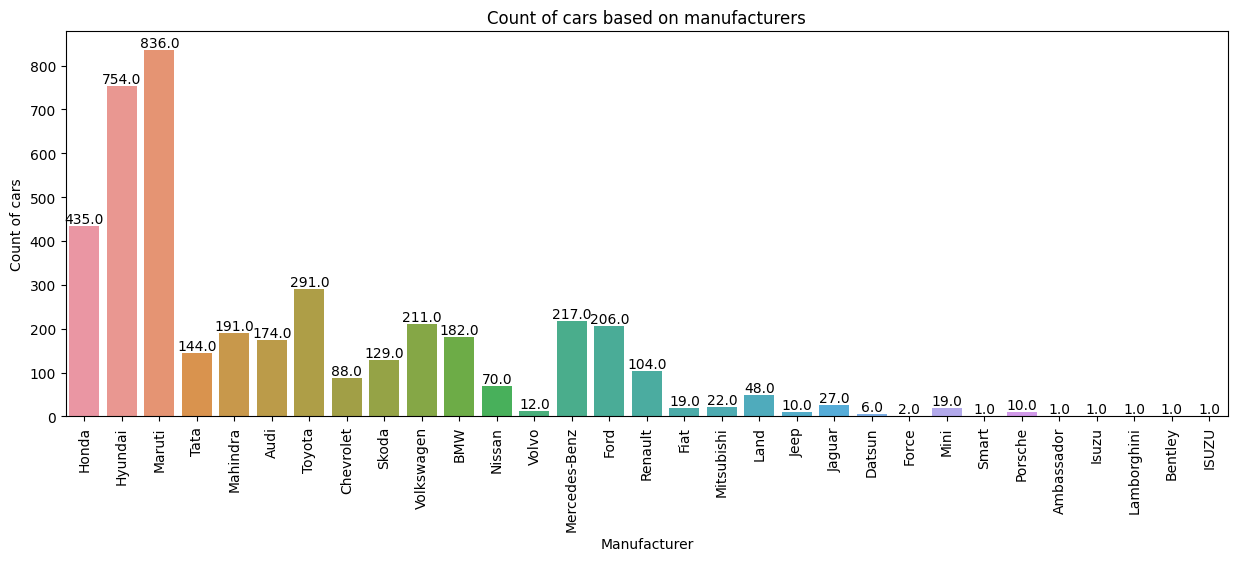

In [15]:
plt.figure(figsize = (15, 5))
plot = sns.countplot(x = 'Manufacturer', data = X_train)

for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

# labels
plt.xticks(rotation = 90) 
plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")
plt.show()

* from the above plot we can infer that Maximum cars in the `training` dataset are by the manufactured **Maruti**
* Let's drop the `Name` column, as it's not required further in our prediction

In [16]:
X_train.drop("Name", axis = 1, inplace = True)
X_test.drop("Name", axis = 1, inplace = True)
X_train.head(5)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Manufacturer
5580,Kochi,2016,67376,Diesel,Manual,First,24.5 kmpl,1498 CC,98.6 bhp,7.0,Honda
3054,Mumbai,2014,11000,Petrol,Manual,First,17.01 kmpl,1591 CC,121.3 bhp,5.0,Hyundai
1594,Kochi,2015,24782,Petrol,Manual,First,20.85 kmpl,1197 CC,83.14 bhp,5.0,Maruti
5316,Hyderabad,2016,100303,Diesel,Manual,First,22.95 kmpl,1248 CC,74 bhp,5.0,Tata


### Location

Location should not be a determinant for the price of a car and I'll safely remove it.

In [17]:
X_train.drop("Location", axis = 1, inplace = True)
X_test.drop("Location", axis = 1, inplace = True)

### Year

Year has no significance on its own unless we try to extract how old a car is from this and see how its resale price may get affected.

In [18]:
curr_time = datetime.datetime.now()
X_train['Year'] = X_train['Year'].apply(lambda x : curr_time.year - x)
X_test['Year'] = X_test['Year'].apply(lambda x : curr_time.year - x)

# as the price may vary with respect to the age of the car, so we calculate how much old the car is 

X_train.head(5)

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Manufacturer
1237,11,60000,Diesel,Automatic,First,17.32 kmpl,1968 CC,184 bhp,5.0,Audi
3830,10,79000,Diesel,Automatic,First,12.55 kmpl,2982 CC,168.5 bhp,7.0,Toyota
991,7,26322,Diesel,Manual,First,28.09 kmpl,1248 CC,88.5 bhp,5.0,Maruti
3773,9,15000,Petrol,Automatic,First,18.9 kmpl,1197 CC,82 bhp,5.0,Hyundai
3287,9,87900,Diesel,Manual,First,16.0 kmpl,2179 CC,140 bhp,7.0,Mahindra


## Mileage

We need to extract the numerical value out of each string and save it in the column, as the units of the data aren't required fot our analysis

In [19]:
mileage_train = X_train["Mileage"].str.split(" ", expand = True)
mileage_test = X_test["Mileage"].str.split(" ", expand = True)

X_train["Mileage"] = pd.to_numeric(mileage_train[0], errors = 'coerce')
X_test["Mileage"] = pd.to_numeric(mileage_test[0], errors = 'coerce')
mileage_train[0] # consists of the value of mileage of the cars

5580     24.5
3054    17.01
1594    20.85
5316    22.95
1944     16.0
        ...  
3425     24.3
2116     19.7
3686     17.5
2951     17.5
508      18.9
Name: 0, Length: 4213, dtype: object

<Axes: xlabel='Mileage', ylabel='Density'>

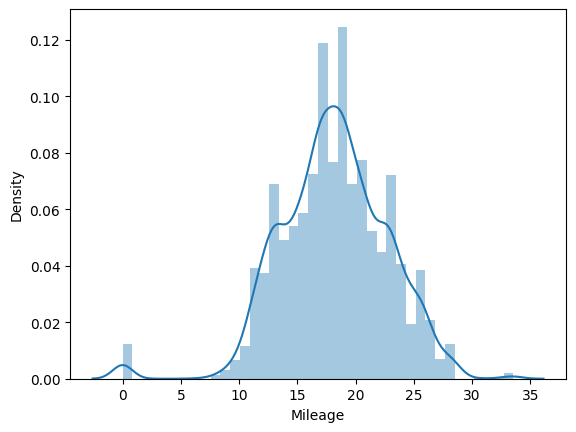

In [20]:
sns.distplot(X_train["Mileage"], bins=40)

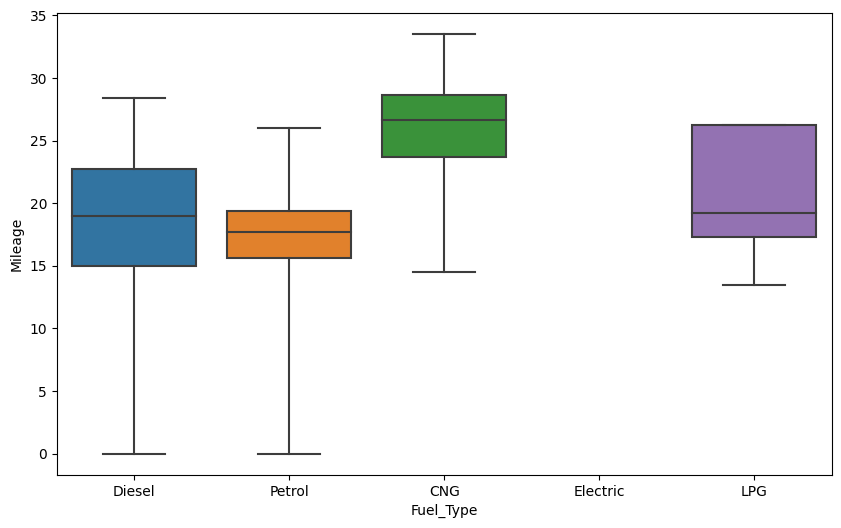

In [21]:
# Mileage vs fuel type of the car
plt.figure(figsize=(10,6))
ml = X_train["Mileage"]
yr = X_train["Fuel_Type"]
sns.boxplot(x=yr, y=ml,
            data=data,
            whis=[0, 100],
            width=.8)

plt.show()

### Engine, Power and Seats
* Removing the units of the recorded data, as they aren't needed for our prediction
* The `Engine` values are defined in CC so I need to remove `CC` from the data. Similarly, `Power` has bhp, so remove `bhp` from it.

In [22]:
X_train.head(5)

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Manufacturer
5580,8,67376,Diesel,Manual,First,24.50,1498 CC,98.6 bhp,7.0,Honda
3054,10,11000,Petrol,Manual,First,17.01,1591 CC,121.3 bhp,5.0,Hyundai
1594,9,24782,Petrol,Manual,First,20.85,1197 CC,83.14 bhp,5.0,Maruti
5316,8,100303,Diesel,Manual,First,22.95,1248 CC,74 bhp,5.0,Tata
1944,8,41000,Diesel,Automatic,First,16.00,2179 CC,140 bhp,7.0,Mahindra


In [23]:
# value of engine volume value is extracted, as we dont want the units
cc_train = X_train["Engine"].str.split(" ", expand = True)
cc_test = X_test["Engine"].str.split(" ", expand = True)

# now we convert the dataframe into series, and updating the engine column
X_train["Engine"] = pd.to_numeric(cc_train[0], errors = 'coerce')
X_test["Engine"] = pd.to_numeric(cc_test[0], errors = 'coerce')

In [24]:
# similarly we do it for power column
bhp_train = X_train["Power"].str.split(" ", expand = True)
bhp_test = X_test["Power"].str.split(" ", expand = True)

X_train["Power"] = pd.to_numeric(bhp_train[0], errors = 'coerce')
X_test["Power"] = pd.to_numeric(bhp_test[0], errors = 'coerce')

In [25]:
# Checking for null values
print("train: "+str(sum(X_train["Engine"].isnull())))
print("test: "+str(sum(X_test["Engine"].isnull())))

train: 25
test: 11


Now, filling the null values present in  `engine` , `power`, `seats`,`Mileage` columns with the mean of other data in the same column 

In [26]:
# filling the null valued data with the mean of other data in the same column
X_train["Mileage"].fillna(X_train["Mileage"].astype("float64").mean(), inplace = True)
X_test["Mileage"].fillna(X_train["Mileage"].astype("float64").mean(), inplace = True)


X_train["Engine"].fillna(X_train["Engine"].astype("float64").mean(), inplace = True)
X_test["Engine"].fillna(X_train["Engine"].astype("float64").mean(), inplace = True)

X_train["Power"].fillna(X_train["Power"].astype("float64").mean(), inplace = True)
X_test["Power"].fillna(X_train["Power"].astype("float64").mean(), inplace = True)

X_train["Seats"].fillna(X_train["Seats"].astype("float64").mean(), inplace = True)
X_test["Seats"].fillna(X_train["Seats"].astype("float64").mean(), inplace = True)

In [27]:
# Checking for null values
print("train: "+str(sum(X_train["Engine"].isnull())))
print("test: "+str(sum(X_test["Engine"].isnull())))

train: 0
test: 0


### Kilometers Driven

`Kilometers_Driven` is a numerical column with a certain range of values.

In [28]:
X_train["Kilometers_Driven"].head()

5580     67376
3054     11000
1594     24782
5316    100303
1944     41000
Name: Kilometers_Driven, dtype: int64

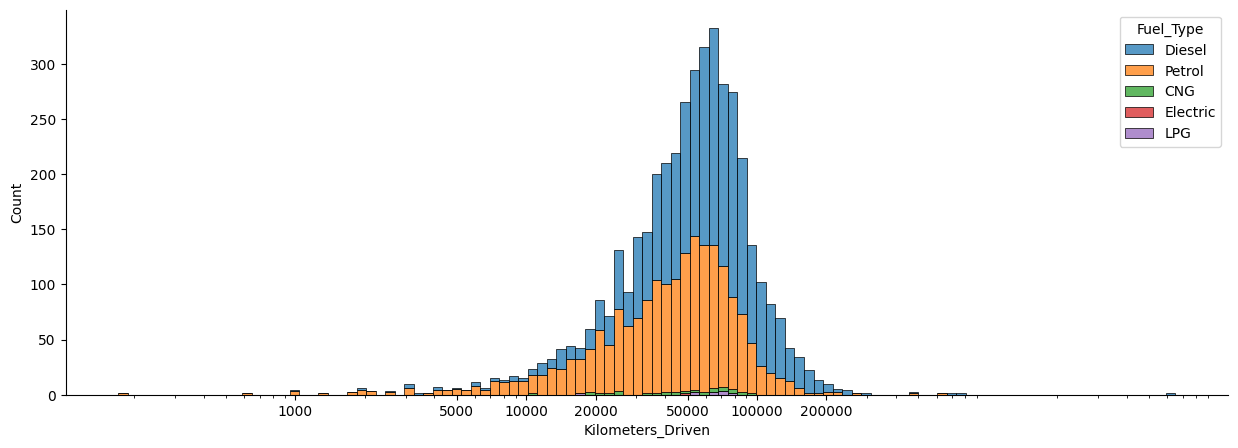

In [29]:
import matplotlib as mpl
kmd = X_train["Kilometers_Driven"]
ft = X_train["Fuel_Type"]
tr = X_train["Transmission"]

f, ax = plt.subplots(figsize=(15, 5))
sns.despine(f)

sns.histplot(
    X_train,
    x="Kilometers_Driven", hue="Fuel_Type",
    multiple="stack",
    linewidth=.5,
    log_scale=True,
)

ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([1000,5000,10000, 20000, 50000,100000, 200000])

plt.show()

* plotting the `heatmap` to obtain the correlation among the attributes

In [30]:
# -ve correlated is inversely proportional, similarly for +ve corr is directly proportional 

<Axes: >

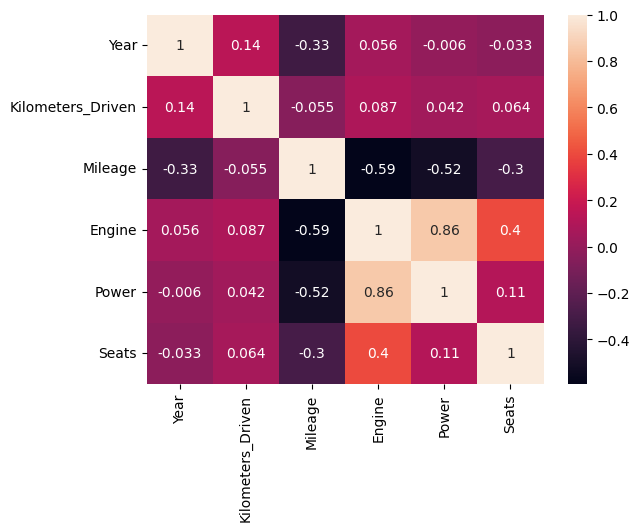

In [31]:
sns.heatmap(X_train.corr(), annot=True)

## Data Processing

* Now that we have worked with the training data, let's create dummy columns for categorical columns using one-hot encoding before we begin training.
* **One hot encoding** is a technique that we use to represent **categorical variables as numerical values** in a machine learning model.

In [32]:
X_train.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Manufacturer
5580,8,67376,Diesel,Manual,First,24.50,1498.0,98.60,7.0,Honda
3054,10,11000,Petrol,Manual,First,17.01,1591.0,121.30,5.0,Hyundai
1594,9,24782,Petrol,Manual,First,20.85,1197.0,83.14,5.0,Maruti
5316,8,100303,Diesel,Manual,First,22.95,1248.0,74.00,5.0,Tata
1944,8,41000,Diesel,Automatic,First,16.00,2179.0,140.00,7.0,Mahindra


In [33]:

X_train = pd.get_dummies(X_train,
                         columns = ["Manufacturer", "Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True)
X_train_copy = X_train.copy()
X_train.sample(5)

#the manufacturer, fuel_type, transmissionm, owner_type column is categorized in numerical form

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Bentley,Manufacturer_Chevrolet,...,Manufacturer_Volkswagen,Manufacturer_Volvo,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
3276,15,63000,19.70,796.0,46.30,5.0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1501,11,123000,12.55,2982.0,168.50,7.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
177,10,29000,22.54,1396.0,88.73,5.0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3071,12,61000,14.40,1598.0,103.60,5.0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
5200,6,38171,22.50,999.0,67.00,5.0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


similarly we create the dummy columns for X_test data also

In [34]:
X_test.head(4)

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Manufacturer
108,12,65000,Diesel,Manual,Second,16.00,2179.0,140.00,7.0,Mahindra
3108,12,55362,Diesel,Manual,First,21.90,1396.0,88.80,5.0,Hyundai
4726,8,42000,Diesel,Automatic,First,15.73,1968.0,174.33,5.0,Audi
4162,12,60500,Petrol,Manual,First,21.10,814.0,55.20,5.0,Hyundai


In [35]:
X_test = pd.get_dummies(X_test,
                         columns = ["Manufacturer", "Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True)
X_test.sample(5)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Manufacturer_BMW,Manufacturer_Chevrolet,Manufacturer_Datsun,Manufacturer_Fiat,...,Manufacturer_Volkswagen,Manufacturer_Volvo,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
5937,13,73000,12.05,2179.0,120.00,8.0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4554,8,70000,21.76,1995.0,190.00,5.0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
5156,8,32450,18.60,1197.0,81.83,5.0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2619,8,46522,24.00,1120.0,70.00,5.0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2377,10,55277,20.51,998.0,67.04,5.0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


It might be possible that the dummy column creation would be different in test and train data, thus, I'd fill in all missing columns with zeros.

In [36]:
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

## Training and predicting

`Standardizing the data`
* StandardScaler is a preprocessing technique used in machine learning to standardize the features of a dataset, to ensure the data are in same scale for modeling
* its done by removing the mean and scales each variable to unit variance

In [37]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

* so now we will create a **Linear Regression** model and a **Random Forest** model to train on the data and use it for future predictions
* and compare the score of the two models

In [38]:
X_test.shape

(1806, 44)

## linear regression

In [39]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, ytrain)
y_pred = linearRegression.predict(X_test)
# r2_score is a measurement done to check the goodness and fit of the model
print(r2_score(ytest, y_pred))

0.7686159711970911


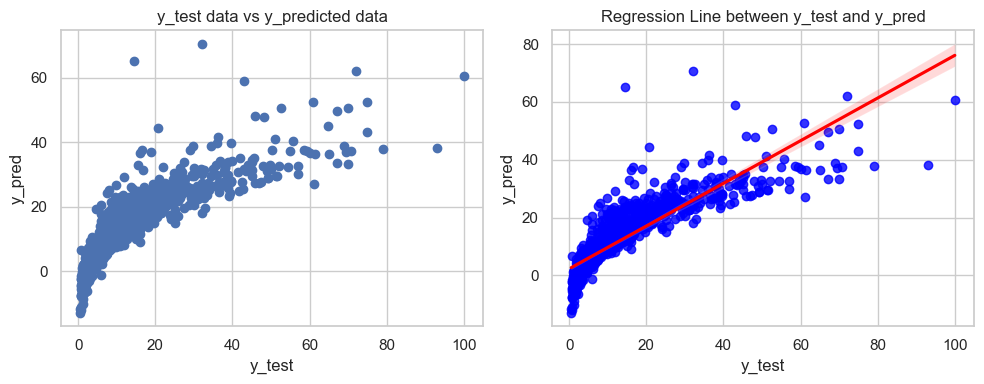

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))  # Adjusting the figure size to accommodate two plots side by side

# First subplot
plt.subplot(1, 2, 1)
plt.title("y_test data vs y_predicted data")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.scatter(ytest, y_pred)

# Second subplot
plt.subplot(1, 2, 2)
sns.regplot(x=ytest, y=y_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Regression Line between y_test and y_pred')

# Display the plots
plt.tight_layout()
plt.show()


The `Linear regression` model performed the with a R2 score of approx **0.768**

**error rate of the model**

In [42]:
from sklearn.metrics import mean_squared_error
print("MSE:",mean_squared_error(ytest,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(ytest,y_pred)))

MSE: 30.882358536758534
RMSE: 5.557189805716423


## random forest algorithm

In [43]:
rf = RandomForestRegressor(n_estimators = 200)
rf.fit(X_train, ytrain)
y_predr = rf.predict(X_test)
print(r2_score(ytest, y_predr))

0.9151764762539385


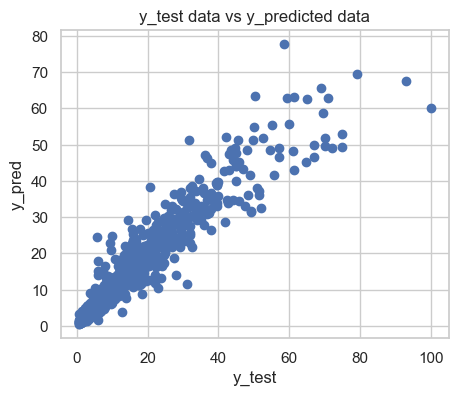

In [51]:
#plot and labels
plt.figure(figsize=(5,4))
plt.title("y_test data vs y_predicted data")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.scatter(ytest, y_predr)
plt.show()

* The `Random Forest` model performed the best with a R2 score of approx **0.915**.
* Hence Random forest r2 score is nearer to 1 and it fits best with the data

In [53]:
from sklearn.metrics import mean_squared_error
print("MSE:",mean_squared_error(ytest,y_predr))
print("RMSE:",np.sqrt(mean_squared_error(ytest,y_predr)))

MSE: 11.321224227228047
RMSE: 3.364702695221087


we can infer that, the error rate of random forest approach is less when compared with linear regression model. The r2_score 